# Aprendizagem Automática Avançada
## TP2 - Exercise 1
João Romão - 55760,
Pedro França - 55848

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import sompy
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

## 1.1 Rendering 30 dots to each face of a cube

For our dataset, we generated six groups of 30 random points in a 3D space. Each group of points was centered on each face of a cube of side 2 with geometric center in the origin. Each group of points was randomly generated by fixing one of the coordinates in either -1 or 1, and varying the other two coordinates according to a normal distribution of scale=0.1 (larger values could result in poor performance of the model; see final remarks). Each group of points was saved in separate dataframes and latter concatenated in the `data` array, which gathers all data used for training the SOM.

A visual representation of the data points is also presented, displaying the points in a 3D space together with the wireframe of a side 2 cube, centered in the origin. Three line segments connecting the centers of opposite faces of the cube are also represented, for a better visualization of the relative position of the datapoints in the 3D space.

In [2]:
dlen = 30
scale = 0.1

data1x = np.random.normal(0,scale,size=dlen)
data1y = -1
data1z = np.random.normal(0,scale,size=dlen)
data1 = pd.DataFrame({'x':data1x,'y':data1y,'z':data1z})

data2x = 1 
data2y = np.random.normal(0,scale,size=dlen)
data2z = np.random.normal(0,scale,size=dlen)
data2 = pd.DataFrame({'x':data2x,'y':data2y,'z':data2z})

data3x = np.random.normal(0,scale,size=dlen)
data3y = np.random.normal(0,scale,size=dlen)
data3z = 1 
data3 = pd.DataFrame({'x':data3x,'y':data3y,'z':data3z})

data4x = np.random.normal(0,scale,size=dlen)
data4y = np.random.normal(0,scale,size=dlen)
data4z = -1
data4 = pd.DataFrame({'x':data4x,'y':data4y,'z':data4z})

data5x = -1
data5y = np.random.normal(0,scale,size=dlen)
data5z = np.random.normal(0,scale,size=dlen)
data5 = pd.DataFrame({'x':data5x,'y':data5y,'z':data5z})

data6x = np.random.normal(0,scale,size=dlen)
data6y = 1
data6z = np.random.normal(0,scale,size=dlen)
data6 = pd.DataFrame({'x':data6x,'y':data6y,'z':data6z})

data = np.concatenate((data1,data2,data3,data4,data5,data6))

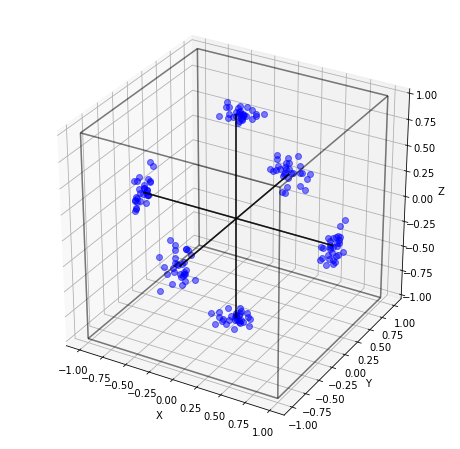

In [3]:
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plotting data points
plt.plot(data[:,0],data[:,1],data[:,2],'ob',alpha=0.5)

plt.show()

## 1.2 Training the SOM

For training the SOM we defined a gridmap of size 10\*10, with a total of 100 neurons. Since we have 180 datapoints, a number os neurons approximately half that value seemed more appropriate than maintaining the original 400 neurons of the example (which had 800 training data points).

We used sompy.SOMFactory.build() for the model. After inspecting the documentation and changing the different parameters, we concluded that the ones provided in the example exercise were the most appropiate ones, with different parameterization having no effect on the model (that we could observe) or even decreading its performance. Changing the lattice from 'rect' to 'planar' produced similar results, despite modifying the topology of the grid, so we left it as it was as well.

As for the training using som.train(), we left n_job=1 but changed verbose to 'None' to disable the messages related to the different epochs of model training.

In [4]:
mapsize = [10,10]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything

## 1.3 Results

The results of the fitted SOM can be observed in a variety of manners, including the observation of the final positions of the neurons, the weights of neurons according to each dimensions, the hitmap, and the U-Matrix. We present all of these results in the next visualizations.

First, we were interested in observing the spatial configuration of the neurons of the fitted grid, which can be accessed through som.codebook.matrix. Unfortunately the plotting of the neurons' connection would render the image uninteligible, so we display only the neurons, which we can see have been adjusted into the rough shape of our datapoint distribution, although 3D visualization can be somewhat limited due to the lack of depth perception. In an effort of minimizing that issue, we project the same cube wireframe from the previous visualization. This time we can see that the neurons do not appear to sit on the top of each face of the cube, which is not problemating since the neurons are not expected to completely replicate the 3D pattern of the data.

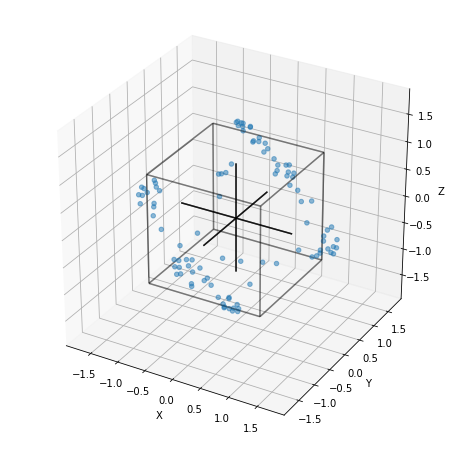

In [5]:
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plotting the neurons
plt.scatter(x=som.codebook.matrix[:,0], y=som.codebook.matrix[:,1],zs=som.codebook.matrix[:,2], alpha=0.5, s=20)

plt.show()

Despite the limitations of 3D perception in a 2D image, we can see that neuron clusters are roughly placed on each face of the cube, implying dimensional separation is more proeminent along each axis for the two opposing faces of the cube in that same axis. By inspecting the weight distribution for each dimension (x, y, and z), we observe that there are indeed two groups of neurons with contrasting weight values (color intensitity reflects weight magnitude, while red and blue represent positive and negative values, respectively, and yellow representing inbetween values). We can conclude that separation of the clusters is happening across all of these dimensions, with each dimension effectively separating two different groups, which are likely to be the opposing faces of the cube.

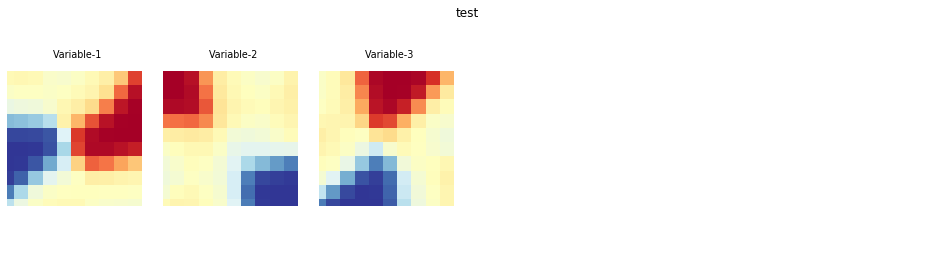

In [6]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim=[0,1,2], cmap=None, col_sz=6) #which_dim='all' default

As we can observe the formation of six clusters in the previous picture, which is in accordance with the nature of our data (data clusters on the six faces of a cube), we can define n_clusters=6 for generating and visualizing the hitmap.

C:\Users\User\anaconda3\lib\site-packages\sompy-1.1.1-py3.7.egg\sompy\visualization\mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


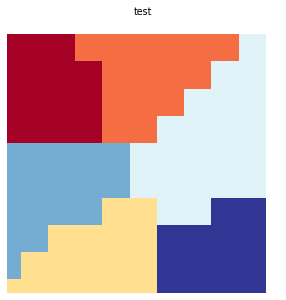

In [7]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
cl = som.cluster(n_clusters=6)

v.show(som, what='cluster')

C:\Users\User\anaconda3\lib\site-packages\sompy-1.1.1-py3.7.egg\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


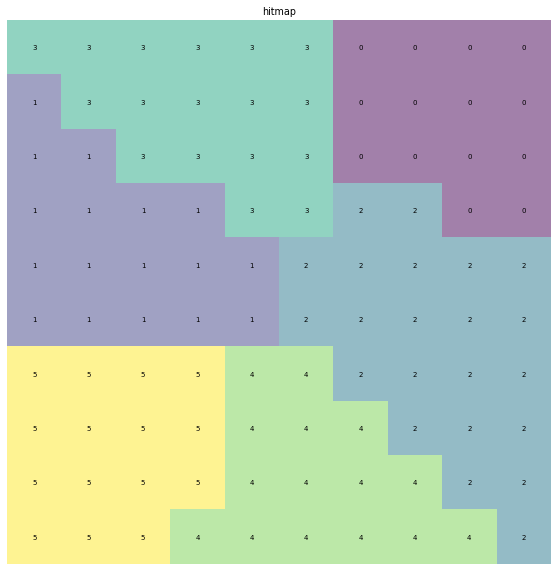

In [8]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

As we observe, the hitmap separates the different neurons into six clusters. As the initial weights of the neurons are random, which together with the competitions, cooperations, and synaptic adaptation fases can alter their final positions, it is not expected that the six clusters have the same number of neurons each, despite each face of the cube having 1/6 of the data. It is important, however, that cluster separation in the U-Matrix is evident, which would happen if we can observe six groups of densely-packed neurons (blue color), bordered by larger distances from the other groups (yellow or even red colors). That is exactly the scenario we observe in the U-Matrix below, so we can conclude that it does in fact reflect the six diferent groups of the original data.

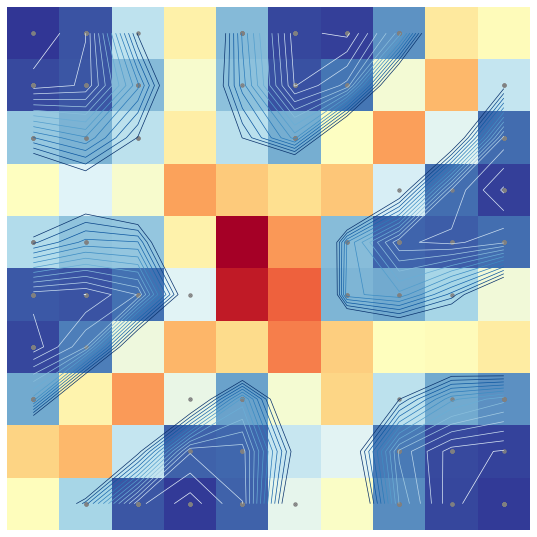

In [9]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

With this represention is possible to see the density of the neurons and the creation of the borders separating the different groups agregations.

### 1.3.1 Visualizing the cluster of each datapoint

Having confirmed that SOM did indeed separate the different groups, we also found it interesting to investigate if each cluster corresponded to the data groups of each face of the cube. For that, we wrote the code bellow that retrieves the neuron onto which each datapoint if projected (i.e., the winning neuron for that datapoint in the final model) using the som.project_data(), as well as the cluster that neuron is assigned to, using getattr(som, 'cluster_labels'). We save the points' coordinates and respective cluster in a dataframe, which was posteriorly separated and plotted according to its cluster, with different colours.

By observing the final image, we see that points of the same face are projected into neurons that are part of the same cluster, strenghtening our conclusions.

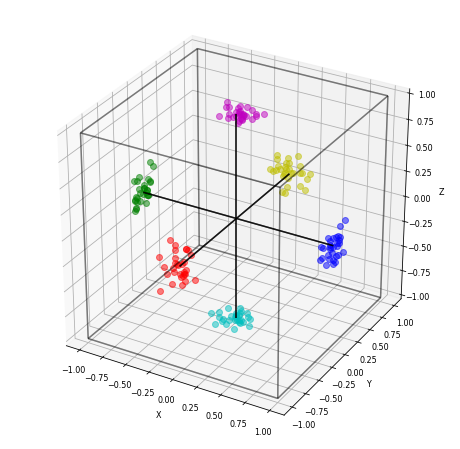

In [10]:
##retrieving the cluster that each data point belongs to
clusters = []

for e in som.project_data(data): #som.project_data(data) retrieves the specific neuron onto which each datapoint is assigned to
    point_cluster = getattr(som, 'cluster_labels')[e] #retriving the cluster number of each specific neuron
    clusters.append(point_cluster)

clusters = np.array(clusters) #transforming list to array

##assigning all the data points + respective cluster to a dataframe
data_df = pd.DataFrame(data=data,
             index=None,
             columns=['x','y','z'])
data_df['cluster'] = clusters

##separating dataframe based on cluster
data_df_0 = data_df[data_df['cluster']==0]
data_df_1 = data_df[data_df['cluster']==1]
data_df_2 = data_df[data_df['cluster']==2]
data_df_3 = data_df[data_df['cluster']==3]
data_df_4 = data_df[data_df['cluster']==4]
data_df_5 = data_df[data_df['cluster']==5]

#plotting the figure
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


##plotting the points of each dataframe, with different colors
plt.plot(data_df_0.iloc[:,0],data_df_0.iloc[:,1],data_df_0.iloc[:,2],'ob',alpha=0.5,color='r')
plt.plot(data_df_1.iloc[:,0],data_df_1.iloc[:,1],data_df_1.iloc[:,2],'ob',alpha=0.5,color='g')
plt.plot(data_df_2.iloc[:,0],data_df_2.iloc[:,1],data_df_2.iloc[:,2],'ob',alpha=0.5,color='b')
plt.plot(data_df_3.iloc[:,0],data_df_3.iloc[:,1],data_df_3.iloc[:,2],'ob',alpha=0.5,color='c')
plt.plot(data_df_4.iloc[:,0],data_df_4.iloc[:,1],data_df_4.iloc[:,2],'ob',alpha=0.5,color='m')
plt.plot(data_df_5.iloc[:,0],data_df_5.iloc[:,1],data_df_5.iloc[:,2],'ob',alpha=0.5,color='y')

plt.show()

Furthermore, we were also interested in visualizing the clusters of the neurons themselves when plotted in the 3D space. We created a dataframe to store the coordinates of each neurons using som.codebook.matrix, and their cluster using getattr(som, 'cluster_labels'). We then followed the plotting approach described for the datapoints in the last visualization.

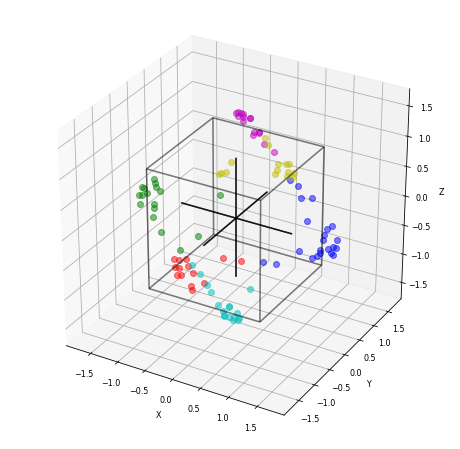

In [11]:
#creating the dataframe with the neuron coordinates and respective cluster
neurons_df = pd.DataFrame(data=som.codebook.matrix,columns=['x','y','z'])
neurons_df['cluster'] = getattr(som, 'cluster_labels')

##separating dataframe based on cluster
neurons_df_0 = neurons_df[neurons_df['cluster']==0]
neurons_df_1 = neurons_df[neurons_df['cluster']==1]
neurons_df_2 = neurons_df[neurons_df['cluster']==2]
neurons_df_3 = neurons_df[neurons_df['cluster']==3]
neurons_df_4 = neurons_df[neurons_df['cluster']==4]
neurons_df_5 = neurons_df[neurons_df['cluster']==5]

#plotting the figure
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

##plotting the points of each dataframe, with different colors
plt.plot(neurons_df_0.iloc[:,0],neurons_df_0.iloc[:,1],neurons_df_0.iloc[:,2],'ob',alpha=0.5,color='r')
plt.plot(neurons_df_1.iloc[:,0],neurons_df_1.iloc[:,1],neurons_df_1.iloc[:,2],'ob',alpha=0.5,color='g')
plt.plot(neurons_df_2.iloc[:,0],neurons_df_2.iloc[:,1],neurons_df_2.iloc[:,2],'ob',alpha=0.5,color='b')
plt.plot(neurons_df_3.iloc[:,0],neurons_df_3.iloc[:,1],neurons_df_3.iloc[:,2],'ob',alpha=0.5,color='c')
plt.plot(neurons_df_4.iloc[:,0],neurons_df_4.iloc[:,1],neurons_df_4.iloc[:,2],'ob',alpha=0.5,color='m')
plt.plot(neurons_df_5.iloc[:,0],neurons_df_5.iloc[:,1],neurons_df_5.iloc[:,2],'ob',alpha=0.5,color='y')

plt.show()

## 2 Optional Exercise

For the optional exercise the workflow was the same as the one previously described. The only difference is that, when generating the clusters on each face of the cube, we did not restrict one of the coordinates to a fixed value (1 or -1), but instead generated points randomly, according to a normal distribution, centered around the coordinate that would otherwise be fixed. Other than than, we generated the data and then trained the model with the same logic as we trained the one in the previous exercise. For that reason, we will skip the description of what is written in the code and focus on interpretation of results.

## 2.1  Rendering 30 dots in a volume centered on each face of a cube.


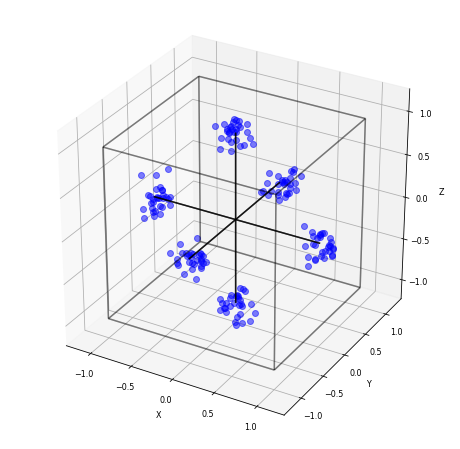

In [12]:
dlen = 30
scale = 0.1

data1x = np.random.normal(0,scale,size=dlen)
data1y = np.random.normal(-1,scale,size=dlen)
data1z = np.random.normal(0,scale,size=dlen)
data1 = pd.DataFrame({'x':data1x,'y':data1y,'z':data1z})

data2x = np.random.normal(1,scale,size=dlen) 
data2y = np.random.normal(0,scale,size=dlen)
data2z = np.random.normal(0,scale,size=dlen)
data2 = pd.DataFrame({'x':data2x,'y':data2y,'z':data2z})

data3x = np.random.normal(0,scale,size=dlen)
data3y = np.random.normal(0,scale,size=dlen)
data3z = np.random.normal(1,scale,size=dlen) 
data3 = pd.DataFrame({'x':data3x,'y':data3y,'z':data3z})

data4x = np.random.normal(0,scale,size=dlen)
data4y = np.random.normal(0,scale,size=dlen)
data4z = np.random.normal(-1,scale,size=dlen)
data4 = pd.DataFrame({'x':data4x,'y':data4y,'z':data4z})

data5x = np.random.normal(-1,scale,size=dlen)
data5y = np.random.normal(0,scale,size=dlen)
data5z = np.random.normal(0,scale,size=dlen)
data5 = pd.DataFrame({'x':data5x,'y':data5y,'z':data5z})

data6x = np.random.normal(0,scale,size=dlen)
data6y = np.random.normal(1,scale,size=dlen)
data6z = np.random.normal(0,scale,size=dlen)
data6 = pd.DataFrame({'x':data6x,'y':data6y,'z':data6z})

data = np.concatenate((data1,data2,data3,data4,data5,data6))

#plotting the figure
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plotting the datapoints
plt.plot(data[:,0],data[:,1],data[:,2],'ob',alpha=0.5)

plt.show()

## 2.2 Training the model

In [13]:
mapsize = [10,10]
som = sompy.SOMFactory.build(data, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose=None)  # verbose='debug' will print more, and verbose=None wont print anything

## 2.3 Results

When plotting the final positions of the neurons we can observe that, altought six clusters are still being formed on the different faces of the cube, the neurons in each cluster are more spread apart. This reflects the nature of our data, which this time is not restricted to the area of each face (2D), but is now spread across the 3D space.

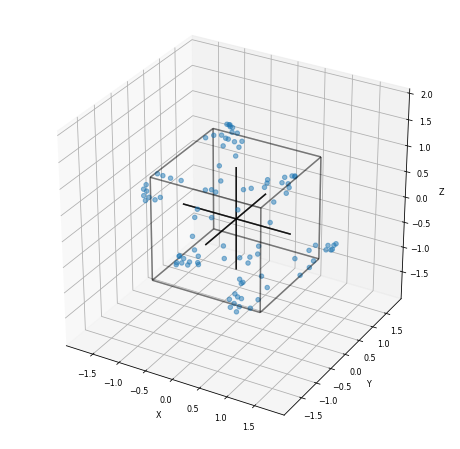

In [14]:
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#plotting the neurons
plt.scatter(x=som.codebook.matrix[:,0], y=som.codebook.matrix[:,1],zs=som.codebook.matrix[:,2], alpha=0.5, s=20)

plt.show()

Similar to exercise 1, it is possible to see the neuron weight distribution on the different dimensions. We can observe the separation of the clusters dividing in 2 different groups in each dimension which, like the other example, is representing the clusters on the opposing faces of the cube.

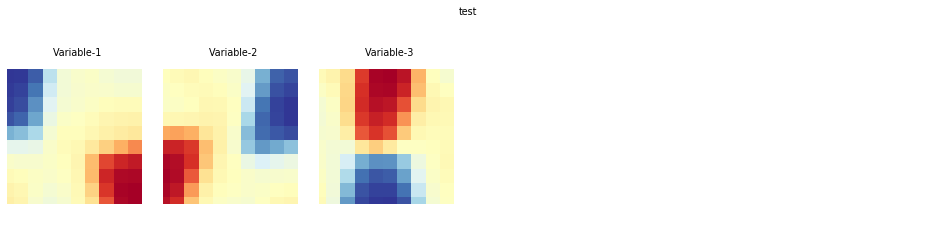

In [15]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim=[0,1,2], cmap=None, col_sz=6) #which_dim='all' default

As expected, the previous figures showed us the formation of six clusters that can be visualized on the hitmap by defining n_clusters=6, just like the first exercise.

C:\Users\User\anaconda3\lib\site-packages\sompy-1.1.1-py3.7.egg\sompy\visualization\mapview.py:163: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


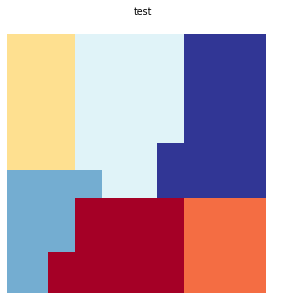

In [16]:
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
cl = som.cluster(n_clusters=6)

v.show(som, what='cluster')

C:\Users\User\anaconda3\lib\site-packages\sompy-1.1.1-py3.7.egg\sompy\visualization\hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


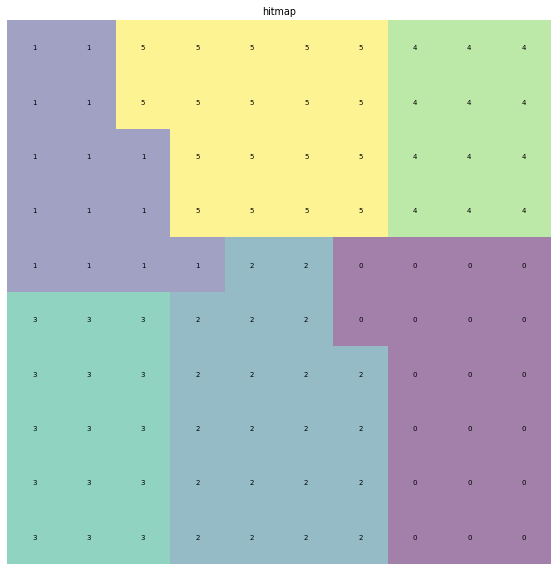

In [17]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

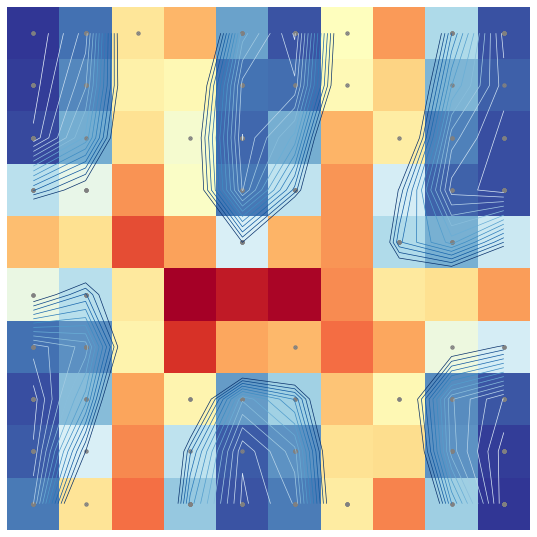

In [18]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)

Finally, the U-Matrix also displays and evident separation of six clusters of neurons, which correpond to the clusters on each face of the cube. Just as a final exercise, we will repeat the visualization of the datapoins and neuron clusters in the 3D plot, thus confirming our conclusions.

### 2.3.1 Visualizing the cluster of each datapoint

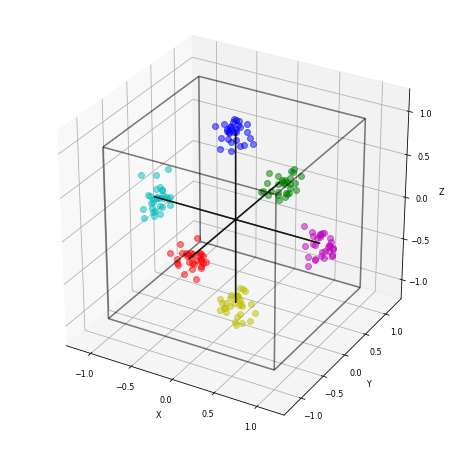

In [19]:
##retrieving the cluster that each data point belongs to
clusters = []

for e in som.project_data(data): #som.project_data(data) retrieves the specific neuron onto which each datapoint is assigned to
    point_cluster = getattr(som, 'cluster_labels')[e] #retriving the cluster number of each specific neuron
    clusters.append(point_cluster)

clusters = np.array(clusters) #transforming list to array

##assigning all the data points + respective cluster to a dataframe
data_df = pd.DataFrame(data=data,
             index=None,
             columns=['x','y','z'])
data_df['cluster'] = clusters

##separating dataframe based on cluster
data_df_0 = data_df[data_df['cluster']==0]
data_df_1 = data_df[data_df['cluster']==1]
data_df_2 = data_df[data_df['cluster']==2]
data_df_3 = data_df[data_df['cluster']==3]
data_df_4 = data_df[data_df['cluster']==4]
data_df_5 = data_df[data_df['cluster']==5]

#plotting the figure
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


##plotting the points of each dataframe, with different colors
plt.plot(data_df_0.iloc[:,0],data_df_0.iloc[:,1],data_df_0.iloc[:,2],'ob',alpha=0.5,color='r')
plt.plot(data_df_1.iloc[:,0],data_df_1.iloc[:,1],data_df_1.iloc[:,2],'ob',alpha=0.5,color='g')
plt.plot(data_df_2.iloc[:,0],data_df_2.iloc[:,1],data_df_2.iloc[:,2],'ob',alpha=0.5,color='b')
plt.plot(data_df_3.iloc[:,0],data_df_3.iloc[:,1],data_df_3.iloc[:,2],'ob',alpha=0.5,color='c')
plt.plot(data_df_4.iloc[:,0],data_df_4.iloc[:,1],data_df_4.iloc[:,2],'ob',alpha=0.5,color='m')
plt.plot(data_df_5.iloc[:,0],data_df_5.iloc[:,1],data_df_5.iloc[:,2],'ob',alpha=0.5,color='y')

plt.show()

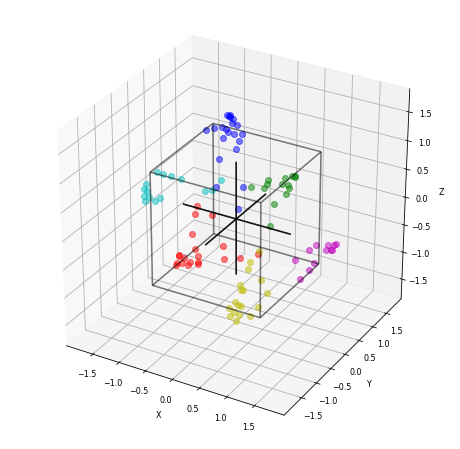

In [20]:
#creating the dataframe with the neuron coordinates and respective cluster
neurons_df = pd.DataFrame(data=som.codebook.matrix,columns=['x','y','z'])
neurons_df['cluster'] = getattr(som, 'cluster_labels')

##separating dataframe based on cluster
neurons_df_0 = neurons_df[neurons_df['cluster']==0]
neurons_df_1 = neurons_df[neurons_df['cluster']==1]
neurons_df_2 = neurons_df[neurons_df['cluster']==2]
neurons_df_3 = neurons_df[neurons_df['cluster']==3]
neurons_df_4 = neurons_df[neurons_df['cluster']==4]
neurons_df_5 = neurons_df[neurons_df['cluster']==5]

#plotting the figure
fig = plt.figure(figsize=(8,8))

#plotting the cube
ax = fig.add_subplot(111, projection='3d')
r = [-1,1]
X, Y = np.meshgrid(r, r)
one = np.ones(4).reshape(2, 2)
zero = np.zeros(4).reshape(2, 2)

ax.plot_wireframe(X,Y,one, alpha=0.3, color='black')
ax.plot_wireframe(X,Y,-one, alpha=0.3, color='black')
ax.plot_wireframe(X,-one,Y, alpha=0.3, color='black')
ax.plot_wireframe(X,one,Y, alpha=0.3, color='black')
ax.plot_wireframe(one,X,Y, alpha=0.3, color='black')
ax.plot_wireframe(-one,X,Y, alpha=0.3, color='black')

ax.plot_wireframe(X,zero,zero, alpha=0.7, color='black')
ax.plot_wireframe(zero, zero, X, alpha=0.7, color='black')
ax.plot_wireframe(zero, X, zero, alpha=0.7, color='black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

##plotting the points of each dataframe, with different colors
plt.plot(neurons_df_0.iloc[:,0],neurons_df_0.iloc[:,1],neurons_df_0.iloc[:,2],'ob',alpha=0.5,color='r')
plt.plot(neurons_df_1.iloc[:,0],neurons_df_1.iloc[:,1],neurons_df_1.iloc[:,2],'ob',alpha=0.5,color='g')
plt.plot(neurons_df_2.iloc[:,0],neurons_df_2.iloc[:,1],neurons_df_2.iloc[:,2],'ob',alpha=0.5,color='b')
plt.plot(neurons_df_3.iloc[:,0],neurons_df_3.iloc[:,1],neurons_df_3.iloc[:,2],'ob',alpha=0.5,color='c')
plt.plot(neurons_df_4.iloc[:,0],neurons_df_4.iloc[:,1],neurons_df_4.iloc[:,2],'ob',alpha=0.5,color='m')
plt.plot(neurons_df_5.iloc[:,0],neurons_df_5.iloc[:,1],neurons_df_5.iloc[:,2],'ob',alpha=0.5,color='y')

plt.show()

## 3. Final remarks

Overall we observed that SOM were able to accurately cluster the different groups of points in the face of the cube. Nevertheless, it is important to mention that the scale parameter (standard deviation) of the np.random.normal() had a significant effect on the ability of the algorithm to discriminate between groups. That is, for a large enough scale factor, there was overlapping of datapoints from different clusters, which caused the algorithm to perform poorly, as the data clusters were not as clearly separate. The SOM for the last exercise was particularly sensitive to this factor, as data points on each face were being spread across 3 dimensions, which facilitated overlapping. For that reason, we left scale=0.1 for both exercises, but by experimenting with different values we could infer its effect. However, it makes sense that the algorithm behaves this way, as it is ignorant to the nature of the dataset, meaning that if data is not properly separated in the n-dimensional space, it is not possible to create clusters from it, or at least clusters that are in accordance to the origin of our data.

We also observed that, unlike the example presented for this exercise, which was in 2D, group separation was only possible by combining the weight separation across 3 dimensions (variables), as representing the data on a single dimension only allowed the separation of two groups. This was the case for both examples, altough when increasing the scale factor this separation was less evident due to overlapping of datapoins from different faces, as previously discussed. The same could be concluded for the U-Matrices, which did not display proper cluster separation for large scale factors. However, for the scale factor we present in this notebook, the U-Matrices were successfull in discrimination between the different clusters.

Lastly, we also constructed two further visualizations to repretent the clusters in the 3D space, both for the neurons and the datapoints. This was done to confirm our hypothesis that the six clusters the SOM found were pertaining to the data on each face of the cube.